### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-12-19 21:46:01.859 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
##### 更新技術分析資料 #####


2025-12-19 21:46:02.534 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-09


2025-12-19 21:46:10.709 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-10


2025-12-19 21:46:19.329 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-11


2025-12-19 21:46:27.470 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-12


2025-12-19 21:46:35.191 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-19 21:46:38.951 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-19 21:46:42.964 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-15


2025-12-19 21:46:52.937 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-16


2025-12-19 21:47:01.532 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-17


2025-12-19 21:47:10.355 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-18


2025-12-19 21:47:18.256 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2025-12-19


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

解盤內容：


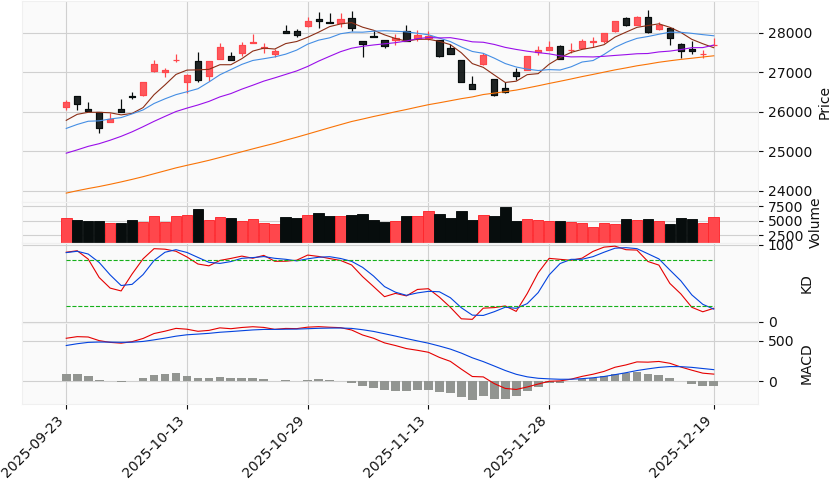

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-18 , 2025-12-19 十字線 : 2025-12-18 , 2025-12-19"
Ｋ線圖,中期為中位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 5683.28億元 ，十日均量 ＝ 5049.86億元）
型態,反轉型態之上升楔形，型態範圍由2025-06-23開始到2025-12-18結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線下彎、10日線下彎，短期翻空；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-19黃金交叉。並且2025-12-19於超賣區。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。
整體評價,根據圖表分析，以下是對當前市場狀況的技術分析： 價格趨勢 近期價格呈現下跌趨勢，K線圖顯示多根黑K線，顯示賣壓較重。短期移動平均線（5日、10日）均向下，且價格位於這些均線之下，顯示短期趨勢偏空。 價量關係 成交量在下跌過程中有所增加，顯示出賣壓增強，空頭力量較強。這種價量配合通常預示著下跌趨勢可能持續。 支撐與壓力 目前價格接近60日移動平均線，該均線可能提供一定的支撐。若跌破此支撐，可能進一步下探至更低的支撐區域。 KD指標 KD指標顯示K線和D線均在低位，且K線略有上揚，顯示出超賣狀態，短期內可能出現技術性反彈。但整體仍處於弱勢區域，需謹慎觀察。 MACD指標 MACD指標顯示DIF線和MACD線均在零軸下方，且柱狀體為負值，顯示出空頭趨勢仍然存在。雖然柱狀體略有縮短，但尚未出現明顯的反轉信號。 綜合評價 整體來看，市場目前處於下跌趨勢中，短期內可能會有技術性反彈，但中期趨勢仍偏空。建議投資者謹慎操作，若持有空頭部位可考慮在反彈時逐步停利，若考慮進場多頭，則需等待更明確的反轉信號出現。


In [5]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數也同步轉強，不過短線還在狹幅盤整區間。  
> 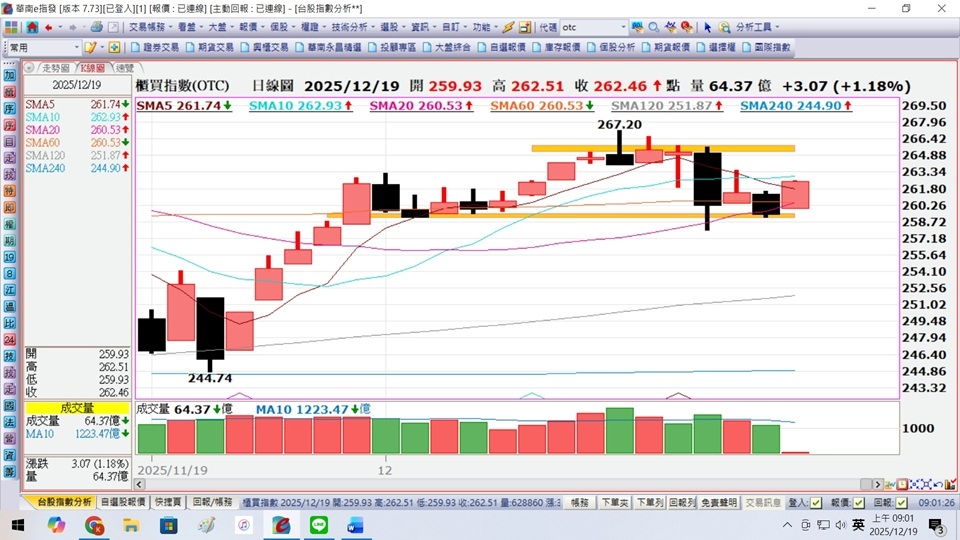  

In [6]:
# 盤整區間
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-12-08'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-12-12']['Close']
    
    # 支撐線
    support_line_start_date = '2025-11-27'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = (range_prices.loc['2025-12-02']['Close'] + range_prices.loc['2025-12-03']['Open']) / 2
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[3.0,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

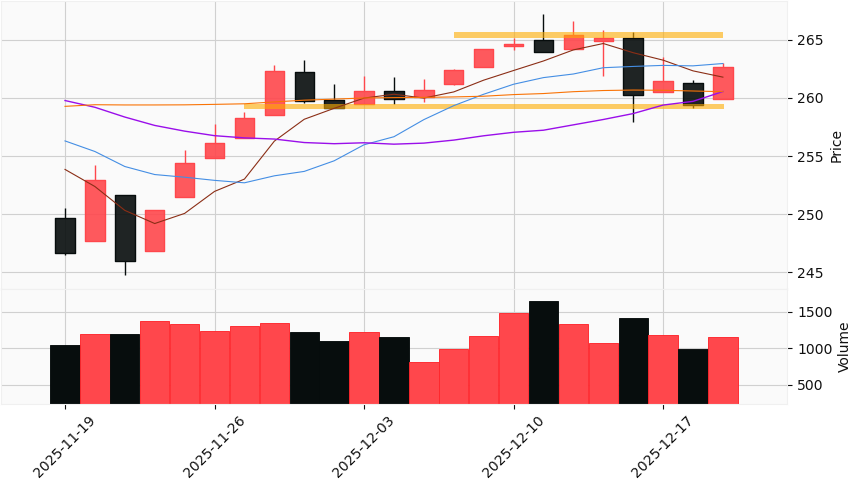

In [7]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TPEx','2025-11-19','2025-12-19',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


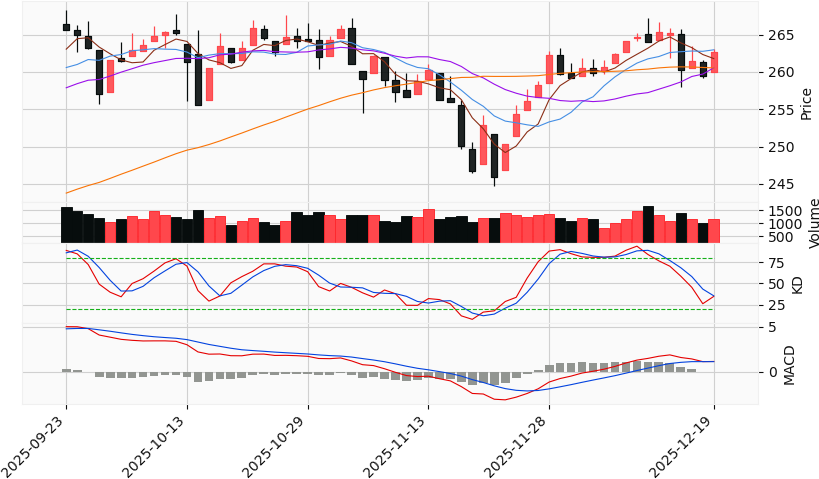

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2025-12-15 孕育線／懷抱線 : 2025-12-17
Ｋ線圖,中期為中位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1156.37億元 ，十日均量 ＝ 1246.58億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線下彎，中期盤整；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-11死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,技術分析 價格趨勢 近期價格呈現盤整走勢，雖然有短期回檔，但整體仍在一個相對穩定的區間內波動。短期移動平均線（5日和10日）與中期移動平均線（20日和60日）交錯，顯示市場缺乏明確的方向。 價量關係 成交量在最近幾個交易日有所波動，顯示市場參與者的情緒不穩定。價格下跌時成交量增加，顯示空頭力量較強，但隨後的反彈成交量未能有效放大，顯示多頭力量不足。 支撐與壓力 - 支撐位：259點附近，這是近期價格多次觸及的低點。 - 壓力位：265點附近，這是近期價格多次未能突破的高點。 KD指標 KD指標顯示K線在低位反彈，從超賣區域回升，顯示短期內可能有反彈的機會，但D線仍在低位，需觀察後續是否能持續上升。 MACD指標 MACD指標顯示DIF線與MACD線接近零軸，且柱狀體縮小，顯示市場動能減弱，短期內可能會有盤整或小幅反彈。 綜合評價 目前市場處於盤整階段，短期內可能會有小幅反彈，但整體趨勢尚不明朗。建議投資者謹慎操作，觀察支撐位和壓力位的突破情況，並根據市場動能的變化調整策略。若價格突破壓力位，則可考慮進一步看多；若跌破支撐位，則需注意風險控制。


In [8]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

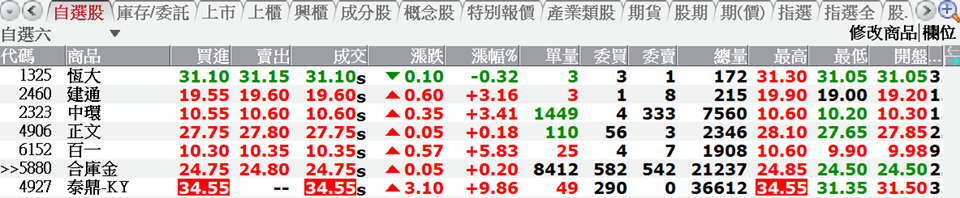  

* 華邦電(2344)  
  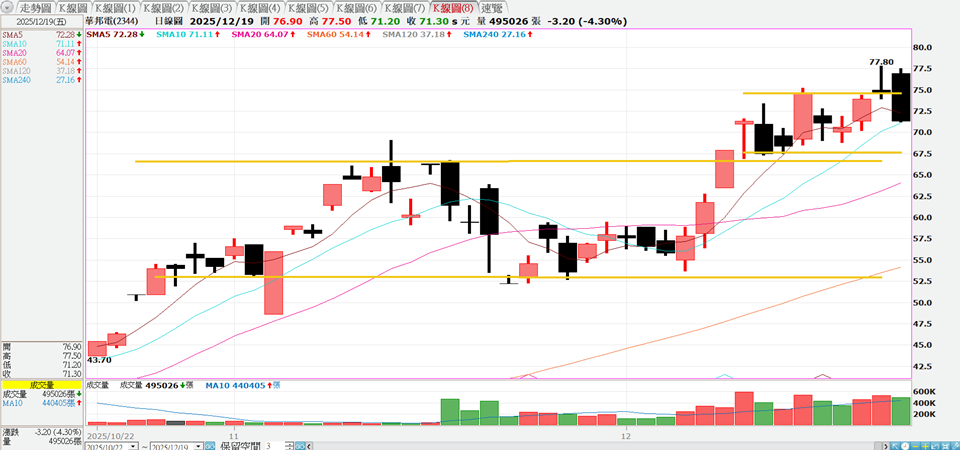  
* 聯電(2303)  
  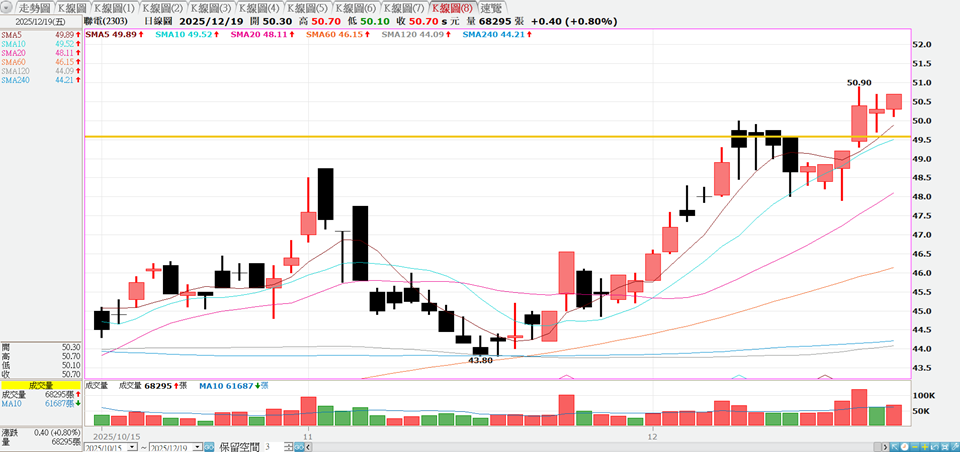  
* 中信金(2891)  
  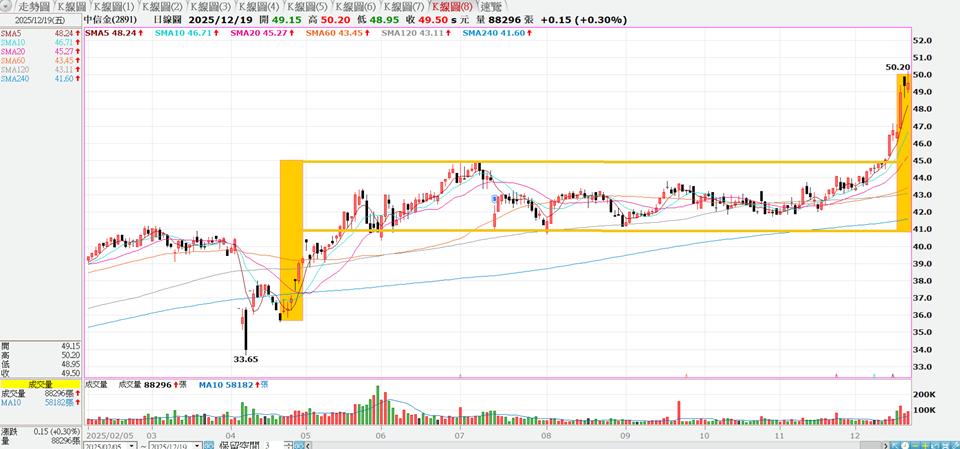  
* 國泰金(2882)  
  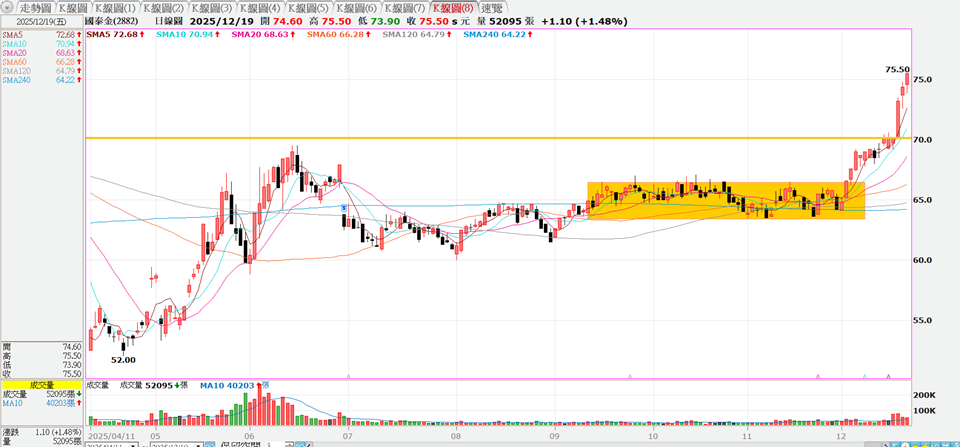  
* 元山(6275)  
  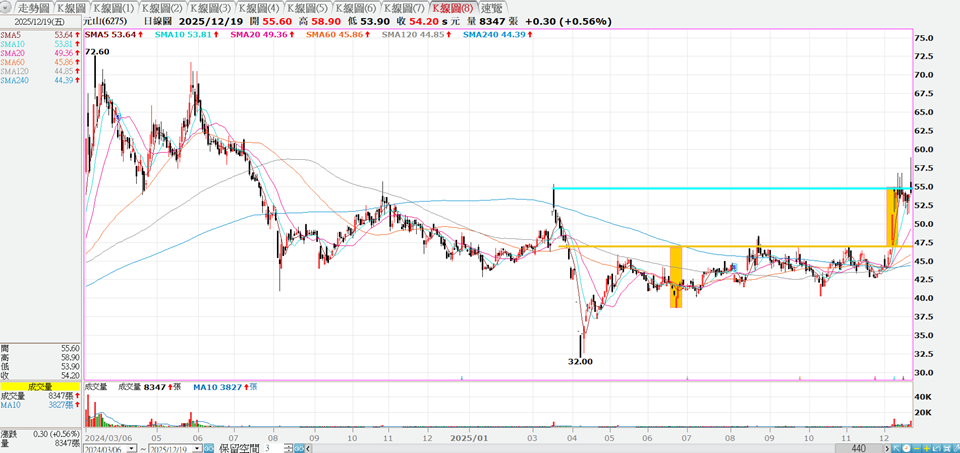  
* 泰鼎-KY(4927)  
  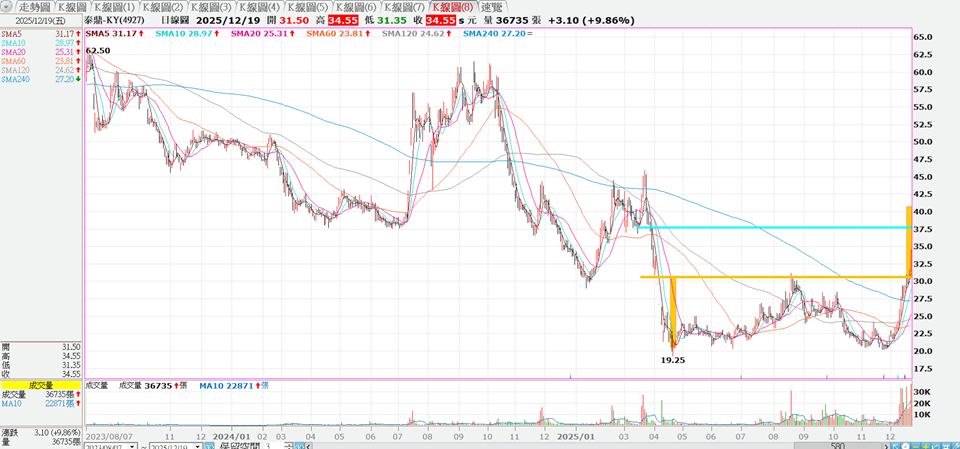  
* 單井(3490)  
  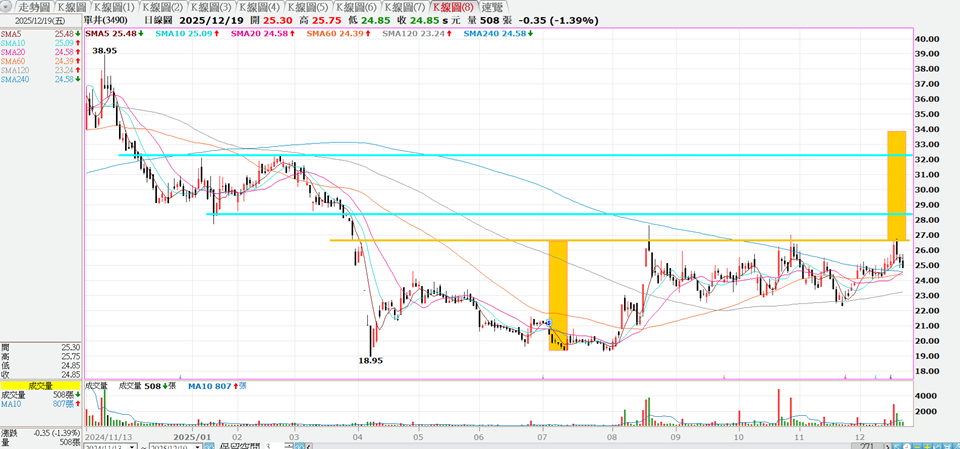  

### 個股解盤  

* 正文(4906)  
  看法：反彈未過頸線，這檔先追蹤至今日。      

> **盤後**：量化技術分析  

解盤內容：


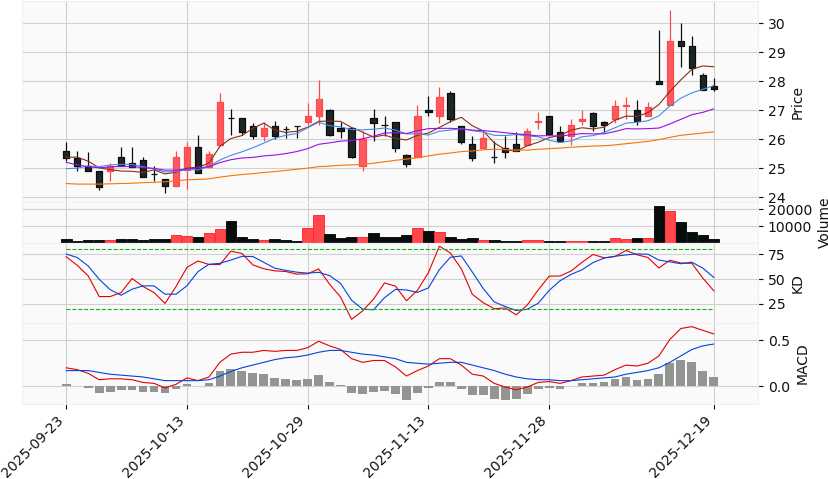

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-16 十字線 : 2025-12-19 吞噬 : 2025-12-15 孕育線／懷抱線 : 2025-12-16 , 2025-12-19"
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：未至大量門檻（成交量 ＝ 2359張 ，十日均量 ＝ 7723張）
型態,反轉型態之三重頂，型態範圍由2025-07-15開始到2025-11-19結束，估算目標價為20.87元。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2025-12-17死亡交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-08當週黃金交叉。
整體評價,根據圖表分析，以下是對當前市場狀況的技術分析： 價格趨勢 近期價格呈現回檔走勢，從高點回落至接近短期移動平均線的位置。整體趨勢從之前的上漲轉為盤整，短期內可能會在28元附近尋找支撐。 價量關係 成交量在價格上漲時顯著增加，顯示出多頭的強勁動能。然而，隨著價格回檔，成交量逐漸減少，顯示出市場的觀望情緒。 支撐與壓力 - 支撐位：28元附近，接近短期移動平均線。 - 壓力位：30元，為近期高點。 KD指標 KD指標顯示K線和D線均向下，且K線已進入超賣區，顯示短期內可能有反彈的機會，但需觀察是否能有效突破。 MACD指標 MACD指標顯示DIF線高於MACD線，但柱狀體縮短，顯示多頭動能減弱，需警惕可能的趨勢反轉。 綜合評價 目前市場處於盤整階段，短期內可能在28元附近尋找支撐。若成交量能夠配合放大，價格有望反彈。建議投資者謹慎觀望，等待更明確的趨勢信號再行進場。若價格跌破支撐位，需考慮停損策略。


In [9]:
stock_analysis(analysis,'4906')

> **盤後**：底部反轉交易策略分析  

In [10]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-31'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-27']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-08-13'
    bottom_price = range_prices.loc['2025-08-13']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(neckline_end_date,neckline_price),(neckline_end_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為33.70元


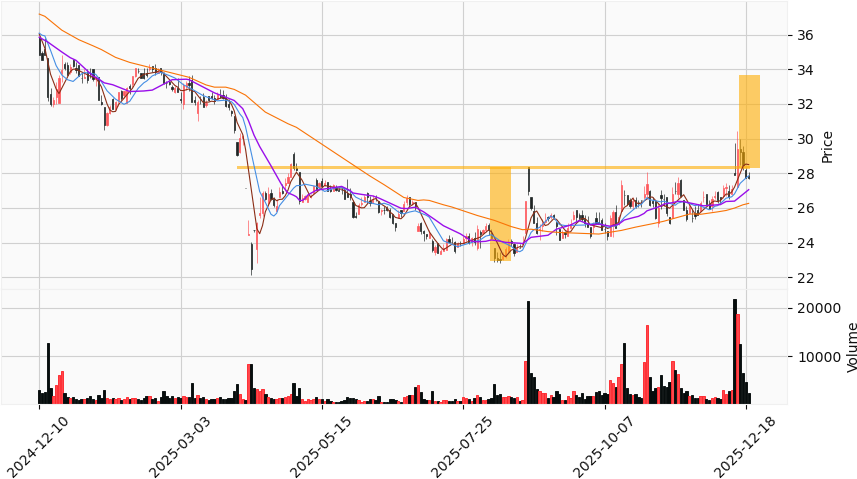

In [11]:
image = mysys.DrawOnKlineChart('4906','2024-12-10','2025-12-19',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-353)：外資小賣(-376)、投信中立(0)、自營小買(+23)。  
主力小賣(-265)。  
分公司買賣家數差分散(-76)。  
融資中立(+16)、融券中立(-3)。  